In [108]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [179]:
df = pd.read_csv('./dataset_complete.csv')

new_df = df.dropna()

my_mean = new_df.mean()
#my_sd = np.std(new_df, axis=0)

#print(my_mean)

means = []
stds = []

my_columns = df.columns[1:-2]

print(my_columns)

for x in my_columns:
    my_mean = new_df[x].mean()
    my_std = new_df[x].std()
    
    means.append(my_mean)
    stds.append(my_std)

    new_df[x] = new_df[x] - my_mean
    new_df[x] = new_df[x] / my_std
    
new_df

Index(['12', '13', '14', '15', '16', '17', '18', '19', '23', '24', '25', '26',
       '27', '28', '29', '34', '35', '36', '37', '38', '39', '45', '46', '47',
       '48', '49', '56', '57', '58', '59', '67', '68', '69', '78', '79', '89'],
      dtype='object')


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,12,13,14,15,16,17,18,19,23,...,58,59,67,68,69,78,79,89,ground_truth,left_image_key
0,0,-0.237392,1.208427,0.544844,0.772787,-0.085710,-0.140624,-0.225519,1.317106,0.977606,...,0.528240,-0.155909,-0.151541,-0.084863,-0.111323,-0.143651,-0.168499,0.529342,2997,cjn1go37btne7071072i75if8
2,2,1.101244,-0.894418,-1.059169,-1.069652,-0.125733,-0.167087,-0.048280,-0.577061,-0.420048,...,-0.786773,-1.078986,-0.163551,-0.126863,-0.114896,-0.181720,-0.167810,-0.421993,2773,cjn1isiz2uosx0710v4dd4zkn
3,3,-0.668744,-0.224241,0.647863,-0.506374,-0.103626,-0.126138,-0.047135,-1.661120,-0.469337,...,-0.534638,0.701625,-0.171362,-0.113683,-0.081828,-0.145012,-0.125588,-1.064177,2773,cjn1jxrspvbfw07105ehmv3dk
4,4,-0.412990,-1.174709,6.000029,2.524117,-0.124846,-0.189167,-0.525008,-0.713779,-1.210828,...,1.961541,5.634681,-0.161012,-0.102398,-0.118421,-0.154830,-0.182517,0.164541,2121,cjn1hfjplu0x40710lhbxrgpb
5,5,-0.243706,-1.045364,-0.786320,-0.229632,-0.119531,-0.142727,0.117481,-0.616912,-0.932465,...,-0.696546,0.272926,-0.182200,-0.138052,-0.113235,-0.174553,-0.161356,-0.834309,1957,cjn1gqgiatokd071012i6dbqz
6,6,-0.313243,0.008138,-0.508921,-0.304815,-0.109295,-0.173784,-0.341702,0.977675,0.084165,...,-0.181855,-1.126935,-0.160056,-0.107359,-0.130653,-0.171662,-0.181592,0.380142,2773,cjn1j1ha99f5c0733e7ke5xhx
7,7,3.064459,2.454021,2.471497,2.304253,-0.058318,-0.098677,14.221182,2.205734,1.353126,...,12.171775,1.006918,-0.151210,0.376243,-0.096516,0.716957,-0.146396,12.887008,3949,cjn1gru0q8cne0733jiue6vtr
8,8,-0.455946,0.328616,-0.049887,0.047230,-0.104063,-0.158184,-0.380613,-0.442483,0.325550,...,-0.167030,0.202885,-0.170791,-0.103086,-0.101443,-0.147397,-0.186191,-0.263267,2121,cjn1hjoabu2qy0710egqxc8w4
9,9,0.535280,-1.000560,0.735268,-0.804257,-0.123500,-0.145694,0.649862,-2.107472,-1.471001,...,-0.534150,0.555863,-0.177779,-0.128752,-0.091236,-0.171544,-0.112451,-0.375078,2121,cjn1i31cxublu0710pb3umuej
11,11,-0.443807,-1.200593,-0.428122,-0.878271,-0.122261,-0.153477,-0.123320,-0.785041,-1.188266,...,-0.740897,-0.442589,-0.156881,-0.128227,-0.114367,-0.170414,-0.140890,-0.581803,2773,cjn1jt82lv8z60710a1qcqfnp


In [180]:
my_df = new_df.loc[:, '12':'89']

array_subset = (np.abs(my_df) > 3).any(axis=1) == False

my_df = my_df.loc[array_subset, :]

Y = new_df['ground_truth'][array_subset]

print(my_df.shape, Y.shape)


(328, 36) (328,)


In [181]:
pca = PCA(n_components=5)

pca.fit(my_df)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [182]:
eigenvalues = pca.explained_variance_ratio_
print(np.sum(eigenvalues))

0.8749654679936846


In [183]:
components = pca.components_

newX = np.dot(my_df, components.T)

newX

#outlierIndices = np.where(newX[:,0] > 10)
#my_indices = my_df.index[outlierIndices[0]]


#my_df.loc[my_indices,:]

array([[ 2.47900839, -0.89742042, -1.28471355,  0.4107494 , -1.02393433],
       [-2.48883184, -1.01662308, -0.04664861,  0.58123687,  0.86674502],
       [-1.86861465,  3.02219716,  0.85078189,  0.73063534, -1.19106101],
       ...,
       [-2.01505119, -0.87536676, -1.05747693,  0.08321584, -0.17578112],
       [ 1.84449203,  1.74273178,  0.99889381, -0.51506475,  0.55524255],
       [-0.68281677, -1.37021834,  0.31622146,  0.27206215, -0.53515079]])

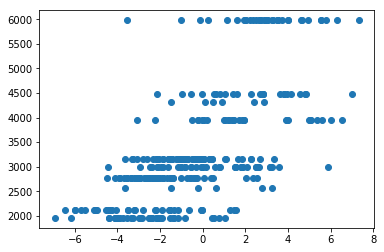

In [194]:
plt.scatter(newX[:,0], Y)#plt.scatter(np.log(newX[:,0]),np.log(Y))
plt.show()

                            OLS Regression Results                            
Dep. Variable:           ground_truth   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.959
Date:                Sat, 13 Oct 2018   Prob (F-statistic):             0.0474
Time:                        04:44:19   Log-Likelihood:                -3139.9
No. Observations:                 328   AIC:                             6282.
Df Residuals:                     327   BIC:                             6286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           137.7144     69.210      1.990      0.0

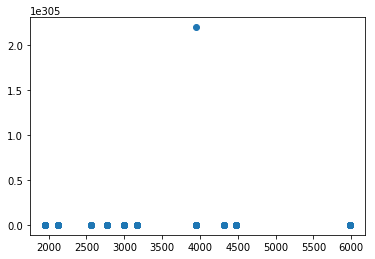

inf

In [197]:
myX = newX[:, 0]
#myX = newX
myY = Y

#print(myX)
#print(myY)

model = sm.OLS(myY, myX).fit()
predictions = model.predict(myX) # make the predictions by the model

print(model.summary())

#predY = np.exp(predictions)

#model.summary()

error = predY - Y

plt.scatter(Y, predY)
plt.show()

np.mean(np.abs(error))